In [1]:
import altair as alt
from vega_datasets import data
import pandas as pd
import os

In [2]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [3]:
data_path = "./bea_exp_data/"

In [4]:
regions = []
exclude = ['united_states.csv', 
         'new_england.csv',
         'mideast.csv', 
         'great_lakes.csv',
         'plains.csv',
         'south_east.csv',
         'south_west.csv',
         'rocky_mountain.csv',
         'far_west.csv']
for file in os.listdir(data_path):
    if file not in exclude:
        regions.append(file)


In [5]:
regions_frame = pd.DataFrame()
list_ = []
for region_ in regions:
    df = pd.read_csv(data_path+region_, header=0, skiprows=4, nrows=24)
    list_.append(df)
regions_frame = pd.concat(list_)

In [6]:
#regions_frame.to_csv("all_states_wide.csv")

In [7]:
lines = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22]
years = [str(each) for each in range(1997, 2018)]

In [8]:
regional_melt_frame = pd.DataFrame()
list_ = []
for line_ in lines:
    regional_linex = pd.melt(regions_frame[(regions_frame.LineCode==line_)], 
                         id_vars=['GeoName', 'Description', 'LineCode'], 
                         value_vars=years, 
                         value_name='Value', 
                         var_name = 'Year')
    list_.append(regional_linex)
regional_melt_frame = pd.concat(list_)

In [9]:
#regional_melt_frame.to_csv("all_states_tall.csv")

In [10]:
health_care = regional_melt_frame[regional_melt_frame["LineCode"] == 16]

In [11]:
health_care.head()

,GeoName,Description,LineCode,Year,Value
0,Alabama,Health care,16,1997,2856
1,Alaska,Health care,16,1997,2804
2,Arizona,Health care,16,1997,2393
3,Arkansas,Health care,16,1997,2520
4,California,Health care,16,1997,2878


In [12]:
health_care['Year_txt'] = health_care['Year']
health_care['Year'] = pd.to_datetime(health_care['Year'], format = "%Y")

c:\users\jasonl\anaconda3\envs\altair\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\jasonl\anaconda3\envs\altair\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


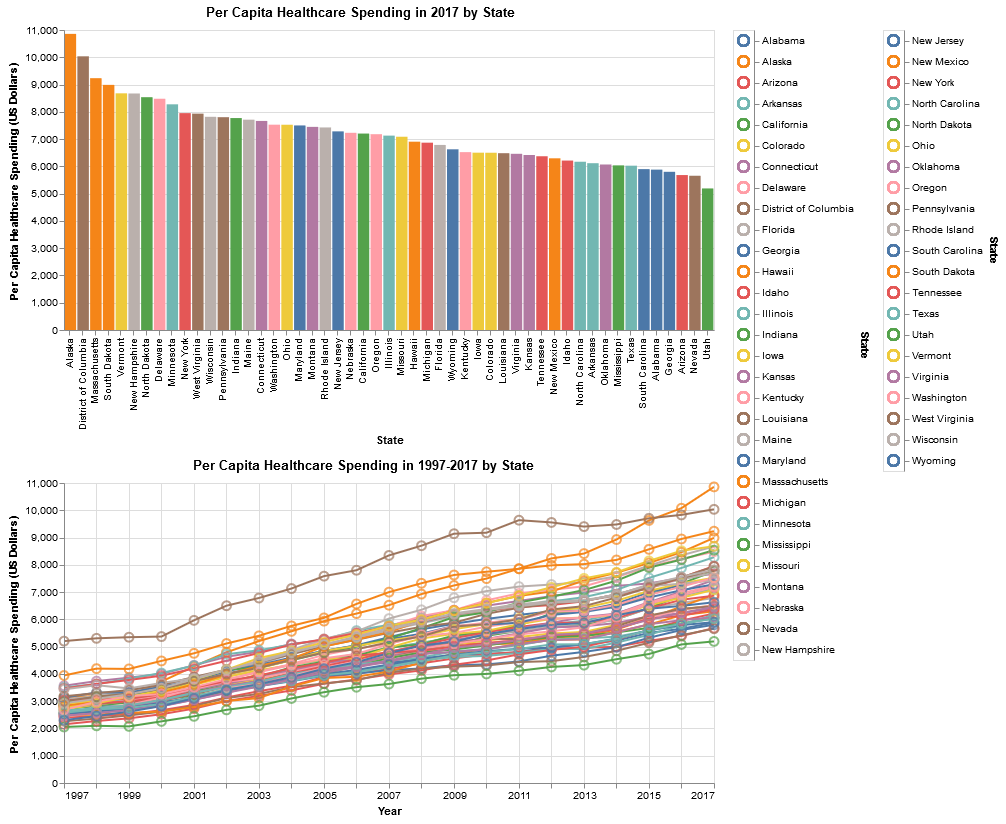

In [21]:
click = alt.selection_multi(fields = ["GeoName"])
color = alt.Color("GeoName:N", legend = None)
highlight = alt.selection(type = 'single', on = 'mouseover', fields = ["GeoName"], nearest = True)


bar_chart = alt.Chart().mark_bar().encode(
    alt.Y("Value:Q", 
          axis = alt.Axis(title = "Per Capita Healthcare Spending (US Dollars)")),
    alt.X("GeoName", 
          sort = alt.EncodingSortField(field = "Value", op = "sum", order = "descending"), 
          axis = alt.Axis(title = "State")),
    tooltip = ["Value"],
    color = alt.condition(click, color, alt.value('lightgray'))
).transform_filter(
    alt.FieldEqualPredicate(field = "Year_txt", equal = 2017)
).add_selection(
    click
).properties(
    width = 650,
    title = "Per Capita Healthcare Spending in 2017 by State"
)

line = alt.Chart().mark_line().encode(
    alt.X("year(Year):T", 
          axis = alt.Axis(title = "Year")),
    alt.Y("Value:Q", 
          axis = alt.Axis(title = "Per Capita Healthcare Spending (US Dollars)")),
    color = alt.condition(click, color, alt.value('lightgray')),
    size = alt.condition(~highlight, alt.value(2), alt.value(5))
).add_selection(
    highlight
).add_selection(
    click
).transform_filter(
    click
).properties(
    width = 650,
    height = 300
)

#this serves as a base layer for the text labels
line_base = alt.Chart().mark_point().encode(
    alt.X("Year", 
          axis = alt.Axis(title = "Year")),
    alt.Y("Value:Q", 
          axis = alt.Axis(title = "Per Capita Healthcare Spending (US Dollars)")),
).transform_filter(
    alt.FieldEqualPredicate(field = "Year_txt", equal = 2011)
)

points = alt.Chart().mark_point().encode(
    alt.X("year(Year):T", 
          axis = alt.Axis(title = "Year")),
    alt.Y("Value:Q", 
          axis = alt.Axis(title = "Per Capita Healthcare Spending (US Dollars)")),
    color = alt.Color("GeoName:N", legend = None),
    tooltip = ["GeoName", "year(Year):T", "Value"],
    size = alt.value(80)
).properties(
    width = 650,
    height = 300,
    title = "Per Capita Healthcare Spending in 1997-2017 by State"
).transform_filter(
    click
)

text = line_base.mark_text(
    align = 'right',
    baseline = 'top',
    dx = 0,
    dy = -10
).encode(
    text = "GeoName",
    opacity = alt.condition(~click, alt.value(0), alt.value(1))
).transform_filter(
    click
)

first_half = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire']

second_half = ['New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']

legend = alt.Chart(health_care).mark_point().encode(
    size = alt.value(120),
    y =alt.Y('GeoName:N', axis = alt.Axis(orient = 'right', title = "State")),
    color = alt.condition(click, color, alt.value('lightgray'))
).add_selection(
    click
).transform_filter(
    alt.FieldOneOfPredicate(field = "GeoName", oneOf = first_half)
)

legend2 = alt.Chart(health_care).mark_point().encode(
    size = alt.value(120),
    y =alt.Y('GeoName:N', axis = alt.Axis(orient = 'right', title = "State")),
    color = alt.condition(click, color, alt.value('lightgray'))
).add_selection(
    click
).transform_filter(
    alt.FieldOneOfPredicate(field = "GeoName", oneOf = second_half)
)

viz = alt.vconcat(bar_chart, line + text + points, data = health_care) | legend | legend2
viz.save('healthcare-viz.html')
viz.save('healthcare-viz-spec.json')
viz

Horizon chart

In [57]:
def makeHorizonChart(state):
    area1 = alt.Chart(health_care).mark_area(
        clip = True,
        interpolate = 'monotone'
    ).encode(
        alt.X("year(Year):T", scale = alt.Scale(zero = False, nice = False)),
        alt.Y("Value:Q", scale = alt.Scale(domain = [0, 4000]), axis = alt.Axis(title = 'Spending')),
        opacity = alt.value(0.25)
    ).properties(
        width = 200,
        height = 50,
        title = state
    ).transform_filter(
        alt.FieldEqualPredicate(field = "GeoName", equal = state)
    )

    area2 = area1.encode(
        alt.Y('dValue:Q', scale = alt.Scale(domain = [0, 4000])),
        opacity = alt.value(0.50)
    ).transform_calculate(
        "dValue", alt.datum.Value - 4000
    )

    area3 = area2.encode(
        alt.Y('ddValue:Q', scale = alt.Scale(domain = [0, 4000])),
        opacity = alt.value(0.75)
    ).transform_calculate(
        'ddValue', alt.datum.Value - 8000
    )

    return area1 + area2 + area3

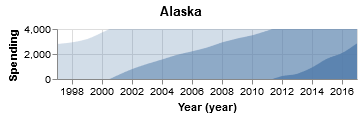

In [42]:
makeHorizonChart("Alaska")

In [67]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming']

states_half1 = states[:10]
states_half2 = states[10:20]
states_half3 = states[20:30]
states_half4 = states[30:40]
states_half5 = states[40:]

In [62]:
len(states[13:23])

10

In [73]:
horizon_chart_states = alt.vconcat()
for state in states_half1:
    horizon_chart_states &= makeHorizonChart(state)

horizon_chart_states2 = alt.vconcat()
for state in states_half2:
    horizon_chart_states2 &= makeHorizonChart(state)
    
horizon_chart_states3 = alt.vconcat()
for state in states_half3:
    horizon_chart_states3 &= makeHorizonChart(state)

horizon_chart_states4 = alt.vconcat()
for state in states_half4:
    horizon_chart_states4 &= makeHorizonChart(state)
    
horizon_chart_states5 = alt.vconcat()
for state in states_half5:
    horizon_chart_states5 &= makeHorizonChart(state)

horizon_chart_overall = horizon_chart_states | horizon_chart_states2 | horizon_chart_states3 | horizon_chart_states4 | horizon_chart_states5
horizon_chart_overall.save('horizon-charts-spec.json')

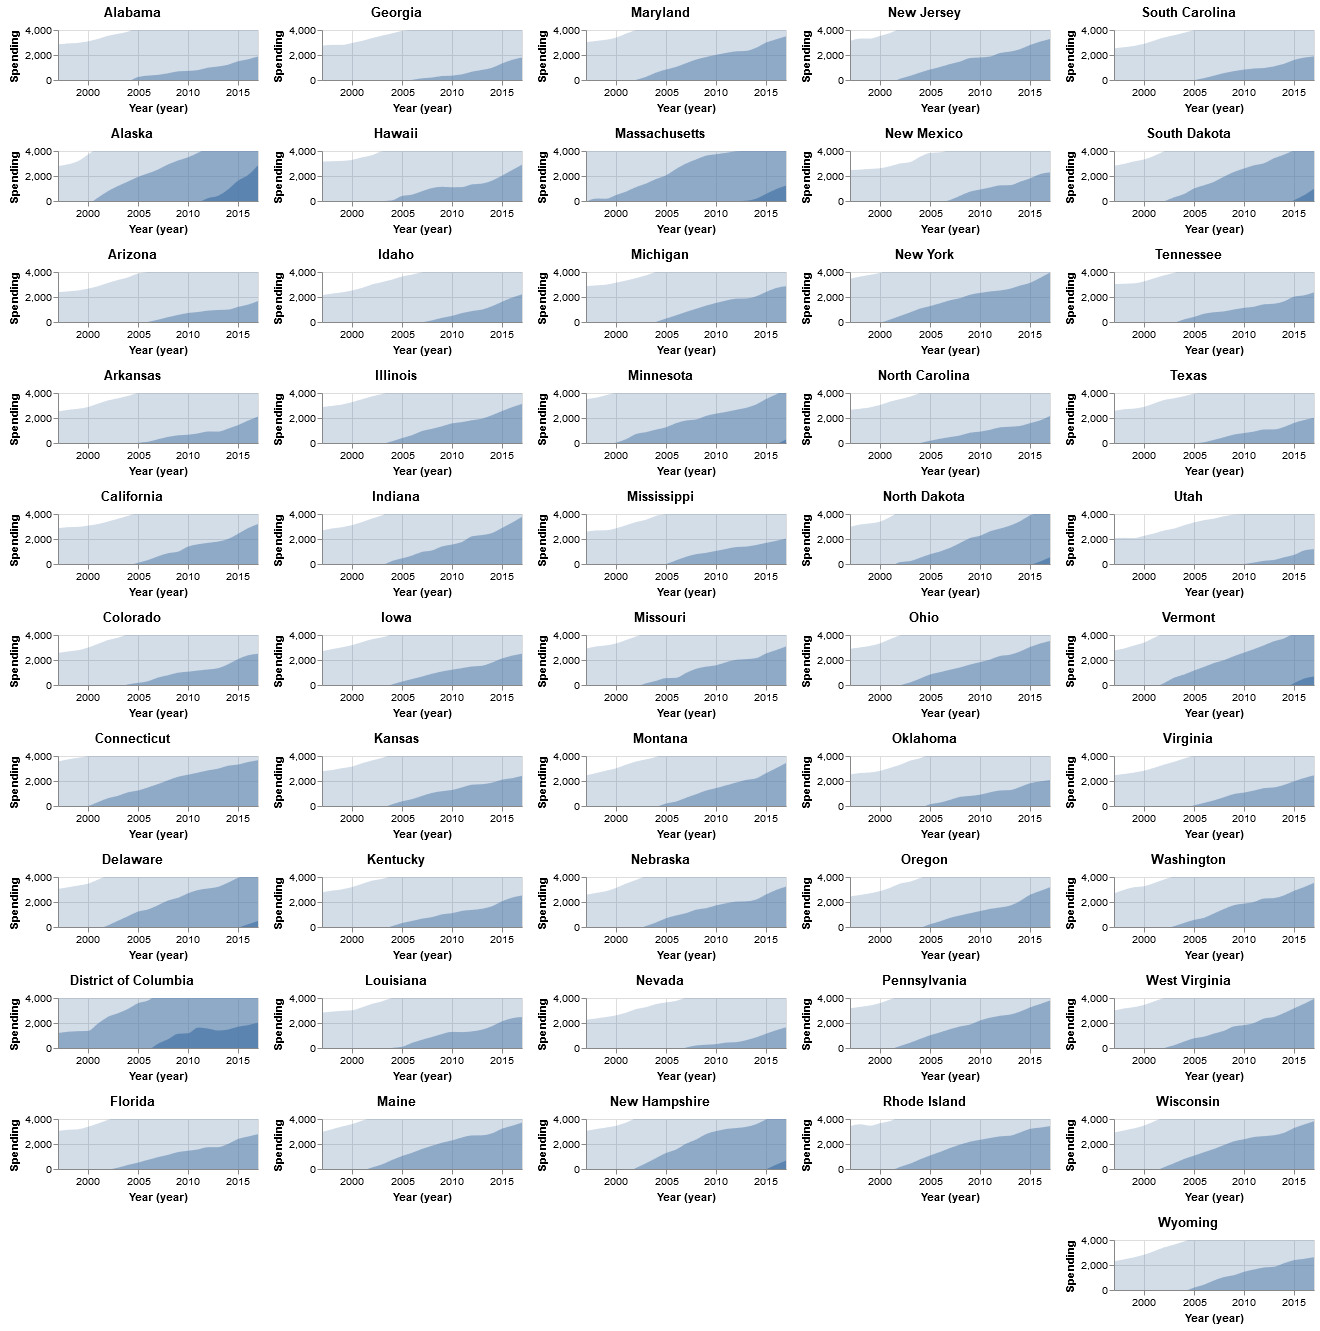

In [74]:
horizon_chart_overall